<p>
<center>
<font size="6">
Visualization: Flight Delay
</font>
</center>
</p>

<p>
<center>
<font size="4">
By Gaofeng Huang
</font>
</center>
</p>

<p>
<center>
<font size="3">
<a href="https://www.kaggle.com/usdot/flight-delays#flights.csv">
    Source: 2015 Flight Delays and Cancellations 
    </a>
</font>
</center>
</p>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import zipfile
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
# set the precision of 2 decimal place.
pd.set_option('display.precision',2)
# pd.options.display.float_format = '{:,.2f}'.format
# zipfile.ZipFile('flight-delays.zip').extractall('.')

In [43]:
# plotly
import plotly.offline as py
#init_notebook_mode(connected=True)

# Data Overview

In [44]:
path = '../input/flight-delays/'
# read data of flight.csv
# a warning claims 'ORIGIN_AIRPORT' and 'DESTINATION_AIRPORT' have type of int data
flight_raw = pd.read_csv(path+'flights.csv', dtype={'ORIGIN_AIRPORT': str, 
                                               'DESTINATION_AIRPORT': str})

### Raw Variables (Column Names)
**YEAR**: Year of the Flight Trip  
**MONTH**: Month of the Flight Trip  
**DAY**: Day of the Flight Trip  
**DAY_OF_WEEK**: Day of week of the Flight Trip  
**AIRLINE**: Airline Identifier  
**FLIGHT_NUMBER**: Flight Identifier  
**TAIL_NUMBER**: Aircraft Identifier  
**ORIGIN_AIRPORT**: Starting Airport  
**DESTINATION_AIRPORT**: Destination Airport  
**SCHEDULED_DEPARTURE**: Planned Departure Time  
**DEPARTURE_TIME**: WHEEL_OFF - TAXI_OUT  
**DEPARTURE_DELAY**: Total Delay on Departure  
**TAXI_OUT**: The time duration elapsed between departure from the origin airport gate and wheels off  
**WHEELS_OFF**: The time point that the aircraft's wheels leave the ground  
**SCHEDULED_TIME**: Planned time amount needed for the flight trip  
**ELAPSED_TIME**: AIR_TIME + TAXI_IN + TAXI_OUT  
**AIR_TIME**: The time duration between wheels_off and wheels_on time  
**DISTANCE**: Distance between two airports  
**WHEELS_ON**: The time point that the aircraft's wheels touch on the ground  
**TAXI_IN**: The time duration elapsed between wheels-on and gate arrival at the destination airport  
**SCHEDULED_ARRIVAL**: Planned arrival time  
**ARRIVAL_TIME**: WHEELS_ON + TAXI_IN  
**ARRIVAL_DELAY**: ARRIVAL_TIME - SCHEDULED_ARRIVAL  
**DIVERTED**: Aircraft landed on airport that out of schedule  
**CANCELLED**: Flight Cancelled (1 = cancelled)  
**CANCELLATION_REASON**: Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security  
**AIR_SYSTEM_DELAY**: Delay caused by air system  
**SECURITY_DELAY**: Delay caused by security  
**AIRLINE_DELAY**: Delay caused by the airline  
**LATE_AIRCRAFT_DELAY**: Delay caused by aircraft  
**WEATHER_DELAY**: Delay caused by weather  

In [45]:
# Count the number of NAN and different values in each column
def count_NA_levels(data):
    for i in data.columns:
        x = data[i].unique()
        y = data[i]
        count_na = data.shape[0] - (y.dropna(axis=0, how='any')).shape[0]
        if count_na > 0:
            print(i + '({} NaN): '.format(count_na) + str(len(x)))
        else:
            print(i + '(no NaN): ' + str(len(x)))

In [46]:
flight_dropna = flight_raw.dropna(axis=0, how='any', 
                                  subset=['ARRIVAL_DELAY', 'DEPARTURE_DELAY'])

In [47]:
count_NA_levels(flight_dropna)

YEAR(no NaN): 1
MONTH(no NaN): 12
DAY(no NaN): 31
DAY_OF_WEEK(no NaN): 7
AIRLINE(no NaN): 14
FLIGHT_NUMBER(no NaN): 6946
TAIL_NUMBER(no NaN): 4896
ORIGIN_AIRPORT(no NaN): 628
DESTINATION_AIRPORT(no NaN): 629
SCHEDULED_DEPARTURE(no NaN): 1320
DEPARTURE_TIME(no NaN): 1440
DEPARTURE_DELAY(no NaN): 1212
TAXI_OUT(no NaN): 184
WHEELS_OFF(no NaN): 1440
SCHEDULED_TIME(no NaN): 549
ELAPSED_TIME(no NaN): 712
AIR_TIME(no NaN): 675
DISTANCE(no NaN): 1350
WHEELS_ON(no NaN): 1440
TAXI_IN(no NaN): 184
SCHEDULED_ARRIVAL(no NaN): 1434
ARRIVAL_TIME(no NaN): 1440
ARRIVAL_DELAY(no NaN): 1240
DIVERTED(no NaN): 1
CANCELLED(no NaN): 1
CANCELLATION_REASON(5714008 NaN): 1
AIR_SYSTEM_DELAY(4650569 NaN): 571
SECURITY_DELAY(4650569 NaN): 155
AIRLINE_DELAY(4650569 NaN): 1068
LATE_AIRCRAFT_DELAY(4650569 NaN): 696
WEATHER_DELAY(4650569 NaN): 633


In [48]:
flight_clean = flight_dropna.loc[:,['MONTH','DAY','DAY_OF_WEEK',
                           'AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT',
                           'DEPARTURE_DELAY','ARRIVAL_DELAY', 'DISTANCE',
                           'AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                           'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'
                          ]]

In [49]:
count_NA_levels(flight_clean)

MONTH(no NaN): 12
DAY(no NaN): 31
DAY_OF_WEEK(no NaN): 7
AIRLINE(no NaN): 14
ORIGIN_AIRPORT(no NaN): 628
DESTINATION_AIRPORT(no NaN): 629
DEPARTURE_DELAY(no NaN): 1212
ARRIVAL_DELAY(no NaN): 1240
DISTANCE(no NaN): 1350
AIR_SYSTEM_DELAY(4650569 NaN): 571
SECURITY_DELAY(4650569 NaN): 155
AIRLINE_DELAY(4650569 NaN): 1068
LATE_AIRCRAFT_DELAY(4650569 NaN): 696
WEATHER_DELAY(4650569 NaN): 633


In [50]:
delay_over15min = flight_clean.dropna(subset=['AIR_SYSTEM_DELAY','SECURITY_DELAY',
                                        'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY',
                                        'WEATHER_DELAY'], how='all')

In [51]:
count_NA_levels(delay_over15min)

MONTH(no NaN): 12
DAY(no NaN): 31
DAY_OF_WEEK(no NaN): 7
AIRLINE(no NaN): 14
ORIGIN_AIRPORT(no NaN): 625
DESTINATION_AIRPORT(no NaN): 625
DEPARTURE_DELAY(no NaN): 1190
ARRIVAL_DELAY(no NaN): 1142
DISTANCE(no NaN): 1339
AIR_SYSTEM_DELAY(no NaN): 570
SECURITY_DELAY(no NaN): 154
AIRLINE_DELAY(no NaN): 1067
LATE_AIRCRAFT_DELAY(no NaN): 695
WEATHER_DELAY(no NaN): 632


In [52]:
delay_over15min.shape

(1063439, 14)

In [53]:
flight_clean[flight_clean.ARRIVAL_DELAY >= 15].shape

(1063439, 14)

In [54]:
flight = flight_clean.drop(['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                           'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis=1)

In [55]:
flight.shape

(5714008, 9)

In [56]:
# create a column to measure delay or not
# DELAY_OR_NOT: True (ARRIVAL_DELAY > 0), False (ARRIVAL_DELAY <= 0)

flight['DELAY_OR_NOT'] = flight.loc[:, ['ARRIVAL_DELAY']] > 0
flight.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE,DELAY_OR_NOT
0,1,1,4,AS,ANC,SEA,-11.0,-22.0,1448,False
1,1,1,4,AA,LAX,PBI,-8.0,-9.0,2330,False
2,1,1,4,US,SFO,CLT,-2.0,5.0,2296,True
3,1,1,4,AA,LAX,MIA,-5.0,-9.0,2342,False
4,1,1,4,AS,SEA,ANC,-1.0,-21.0,1448,False


### Variables (Column Names)

**MONTH**: Month of the Flight Trip  
**DAY**: Day of the Flight Trip  
**DAY_OF_WEEK**: Day of week of the Flight Trip  
**AIRLINE**: Airline Identifier  
**ORIGIN_AIRPORT**: Starting Airport  
**DESTINATION_AIRPORT**: Destination Airport  
**DEPARTURE_DELAY**: Total Delay on Departure  
**ARRIVAL_DELAY**: ARRIVAL_TIME - SCHEDULED_ARRIVAL  
**DISTANCE**: Distance between two airports  

**DELAY_OR_NOT**: True (ARRIVAL_DELAY > 0), False (ARRIVAL_DELAY <= 0)

**AIR_SYSTEM_DELAY**: Delay caused by air system  
**SECURITY_DELAY**: Delay caused by security  
**AIRLINE_DELAY**: Delay caused by the airline  
**LATE_AIRCRAFT_DELAY**: Delay caused by aircraft  
**WEATHER_DELAY**: Delay caused by weather  

## Data Analysis and Visualization
### Departure Delay and Arrival Delay

In [88]:
# read data of airlines.csv for the full name of airlines
airline_name = pd.read_csv(path+'airlines.csv')
airline_name
airports=pd.read_csv('../input/flight-delays/airports.csv')

In [58]:
# merge the fullname of airline companies into flight data
flight_fullname = flight.rename(columns={'AIRLINE': 'IATA_CODE'})
flight_fullname = flight_fullname.merge(airline_name, on='IATA_CODE')

In [59]:
# Make clear on DEPARTURE_DELAY and ARRIVAL_DELAY
# Delay caused before departure or after departure?

airline_deparr_plot = flight_fullname.loc[:, ['AIRLINE', 
                                     'DEPARTURE_DELAY',
                                     'ARRIVAL_DELAY']].groupby('AIRLINE').mean()

In [60]:
airline_deparr_plot

,DEPARTURE_DELAY,ARRIVAL_DELAY
AIRLINE,,
Alaska Airlines Inc.,1.72,-0.98
American Airlines Inc.,8.83,3.45
American Eagle Airlines Inc.,9.97,6.46
Atlantic Southeast Airlines,8.62,6.59
Delta Air Lines Inc.,7.31,0.19
Frontier Airlines Inc.,13.30,12.50
Hawaiian Airlines Inc.,0.47,2.02
JetBlue Airways,11.44,6.68
Skywest Airlines Inc.,7.74,5.85


## Airlines

In [61]:
# use this function to select which airline we are interested
def flight_airline(airline):
    return flight.loc[flight['AIRLINE']==airline]
# draw the number of delays for [what, e.g. MONTH] we want to groupby
def draw_count_delay(data, select, kind='bar'):
    data_select = data.loc[:, [select, 'DELAY_OR_NOT']].groupby(select).sum()
    ax = data_select.plot(kind=kind, figsize=(10,6))
    ax.legend(['Number of Delays'])
    plt.show()

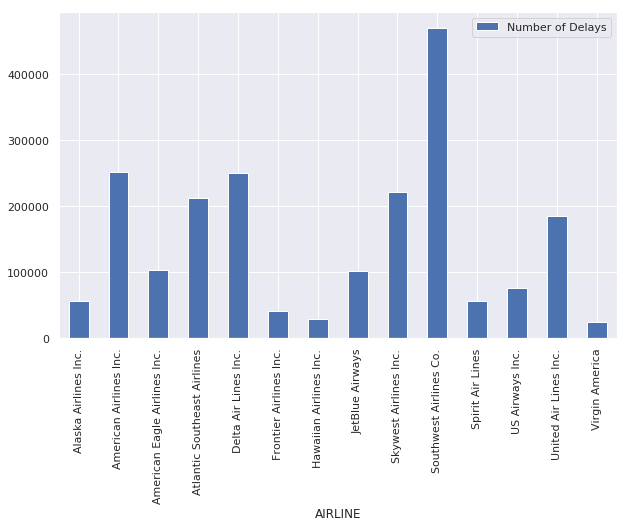

In [62]:
draw_count_delay(flight_fullname, 'AIRLINE')

In [63]:
# split by month
flight_month = flight.loc[:, ['MONTH']].groupby('MONTH').sum()
get_airline = flight.AIRLINE.unique()

for a in get_airline:
    flight_month[a] = flight_airline(a).loc[:, ['MONTH', 'DELAY_OR_NOT']]\
                                        .groupby('MONTH').sum()
#set full name
flight_month.columns = flight_fullname.AIRLINE.unique()

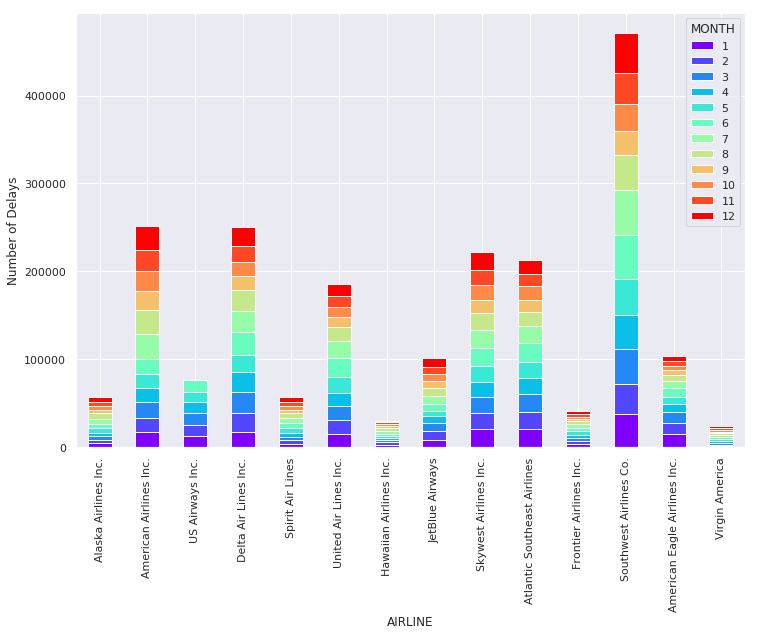

In [64]:
ax = flight_month.T.plot(kind='bar', stacked=True, figsize=(12,8), colormap='rainbow')
ax.set(ylabel='Number of Delays', xlabel='AIRLINE')
plt.show()

In [65]:
# view the market share of these airlines

def airline_marketshare(data=flight_fullname, by='AIRLINE', titlehere='Market Share of Airlines in 2015'):
    df = data.loc[:, [by]]
    df['Share %'] = 1
    top = df.groupby(by).sum().sort_values(by='Share %',ascending=False)
    top = top.reset_index()
    
    sharePlot = top['Share %'].plot.pie(subplots=True,
                                         autopct='%0.2f%%',
                                         fontsize=12,
                                         figsize=(10,10),
                                         legend=False,
                                         labels=top[by],
                                         shadow=False,
                                         explode=(0.01,0.02,0.03,0.04,0.05,0.06,
                                                  0.07,0.08,0.1,0.15,
                                                  0.2,0.25,
                                                  0.3,0.35)[:len(data[by].unique())],
                                         startangle=90,
                                         colormap='summer',
                                         title=titlehere
                                       )
    
    plt.show()

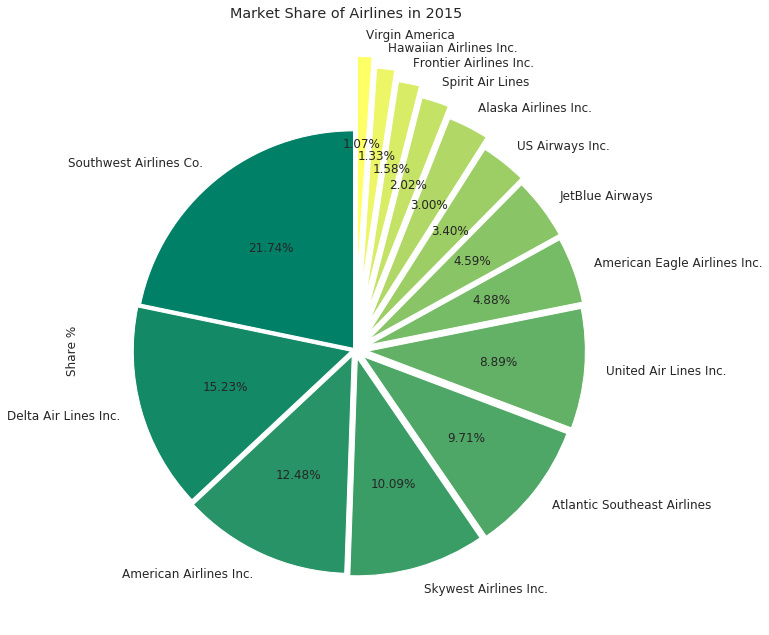

In [66]:
airline_marketshare()

In [67]:
def draw_pct_delay_month(data, select, kind='bar'):
    for m in range(12):
        data_select['{}'.format(m)] = (100*(data.loc[:, [select, 'DELAY_OR_NOT']].groupby(select).sum())
                       /(data.loc[:, [select, 'DELAY_OR_NOT']].groupby(select).count()))
    data_select.plot(kind=kind, stacked=True)
    plt.show()

In [68]:
flight_month_pct = flight.loc[:, ['MONTH']].groupby('MONTH').sum()
airline = flight.AIRLINE.unique()

for a in airline:
    flight_a = flight_airline(a)
    flight_month_pct[a] = 100*(flight_a.loc[:, ['MONTH', 'DELAY_OR_NOT']].groupby('MONTH').sum()
                          /flight_a.shape[0])
flight_month_pct.columns = flight_fullname.AIRLINE.unique()

In [69]:
flight_month_pct.T

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
Alaska Airlines Inc.,2.60,2.31,2.63,2.33,2.79,2.89,3.21,3.74,2.63,2.63,2.64,2.82
American Airlines Inc.,2.52,2.14,2.62,2.27,2.20,2.37,4.04,3.77,2.95,3.17,3.37,3.95
US Airways Inc.,6.54,6.46,6.90,6.63,5.77,6.98,NaN,NaN,NaN,NaN,NaN,NaN
Delta Air Lines Inc.,2.02,2.48,2.79,2.51,2.25,2.96,2.81,2.70,1.91,1.82,2.07,2.50
Spirit Air Lines,3.57,3.58,3.51,3.74,4.75,5.19,4.41,4.84,3.67,3.69,3.88,4.55
United Air Lines Inc.,3.02,3.02,3.24,2.96,3.44,4.37,3.79,3.18,2.20,2.31,2.30,2.84
Hawaiian Airlines Inc.,3.72,3.99,3.89,2.76,3.09,3.19,3.67,4.47,3.51,2.95,2.06,2.39
JetBlue Airways,3.30,3.82,3.55,2.80,2.35,2.90,3.44,3.70,2.89,3.11,2.83,4.23
Skywest Airlines Inc.,3.64,3.23,3.08,2.94,3.16,3.52,3.50,3.46,2.63,2.89,2.98,3.55
Atlantic Southeast Airlines,3.72,3.47,3.81,3.25,3.28,3.87,3.40,3.03,2.41,2.76,2.64,2.81


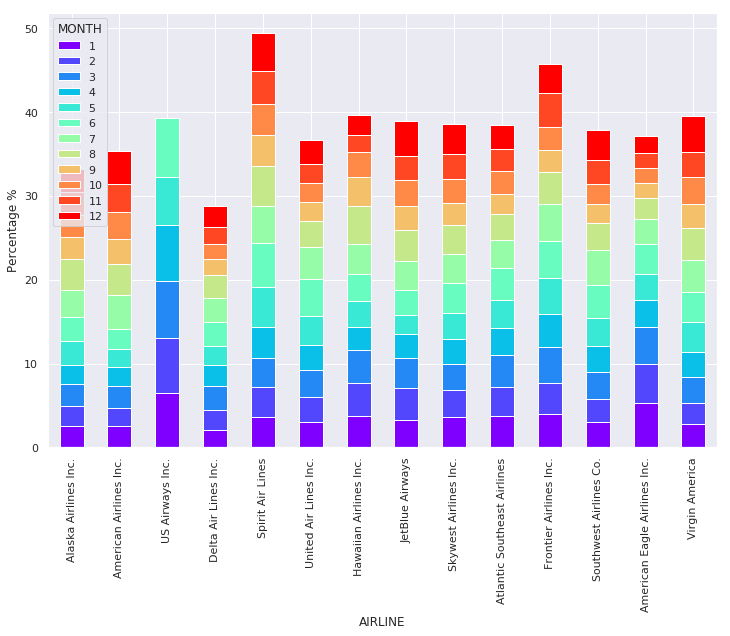

In [70]:
ax = flight_month_pct.T.plot.bar(figsize=(12,8), stacked=True, colormap='rainbow')
ax.set(ylabel='Percentage %',xlabel='AIRLINE')
plt.show()

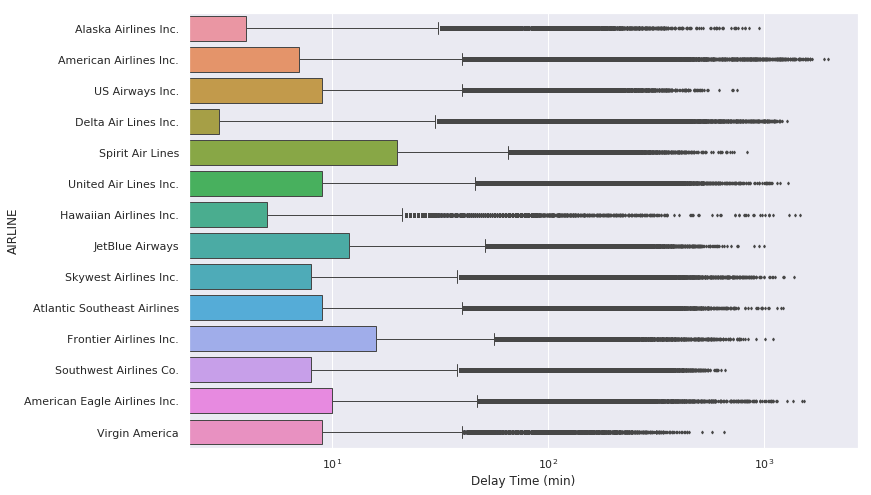

In [71]:
# boxplot of delay time (min) and airlines

a = flight_fullname.loc[:, ['ARRIVAL_DELAY','AIRLINE']]
ax = sns.boxplot(y='AIRLINE', x='ARRIVAL_DELAY', data=a, linewidth=1, fliersize=2)
ax.set(xscale="log", xlabel='Delay Time (min)') #will ignore the negative value (no delays)
plt.show()